# Basic Operations of Neural Networks
In this notebook, we will try on commonly used operations.

In [1]:
# We'll also import a few standard python libraries
from matplotlib import pyplot
import numpy as np
import time

# These are the droids you are looking for.
from caffe2.python import core, workspace
from caffe2.proto import caffe2_pb2

# Let's show all plots inline.
%matplotlib inline

## Relu
[relu](https://en.wikipedia.org/wiki/Rectifier_%28neural_networks%29) is the short name of REctified Linear Unit. It is defined as:
$$ f(x)=max(0,x) $$
A smooth approximation to relu is the analytic function
$$ f(x)=ln(1+e^x) $$

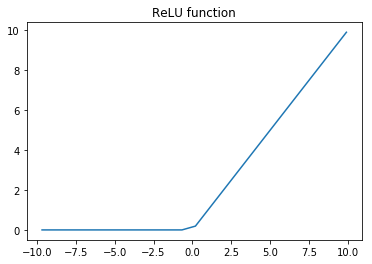

In [2]:
workspace.FeedBlob("X", np.sort(np.random.uniform(-10,10,100).astype(np.float32)))
# Create an operator.
op = core.CreateOperator(
    "Relu", # The type of operator that we want to run
    ["X"], # A list of input blobs by their names
    ["Y"], # A list of output blobs by their names
)
workspace.RunOperatorOnce(op)
# and we are done!
pyplot.plot(workspace.FetchBlob("X"),workspace.FetchBlob("Y"))
pyplot.title("ReLU function");

## Sigmoid
[sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) is defined as:
$$ f(x)=\frac{1}{1+e^{-x}} $$

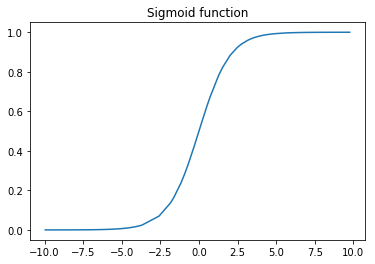

In [3]:
workspace.FeedBlob("X", np.sort(np.random.uniform(-10,10,100).astype(np.float32)))
# Create an operator.
op = core.CreateOperator(
    "Sigmoid", # The type of operator that we want to run
    ["X"], # A list of input blobs by their names
    ["Y"], # A list of output blobs by their names
)
workspace.RunOperatorOnce(op)
# and we are done!
pyplot.plot(workspace.FetchBlob("X"),workspace.FetchBlob("Y"))
pyplot.title("Sigmoid function");

## Softmax
[softmax](https://en.wikipedia.org/wiki/Softmax_function) is defined as
$$ f(z_j) = \frac{e^{z_j}}{\sum\limits^K_{k=1}e^{z_k}} $$
Softmax operation normalize the input and the total of results is 1:
$$ \sum\limits^K_{j=1}{f(z_j)} = \frac{\sum\limits^K_{j=1}{e^{z_j}}}{{\sum\limits^K_{k=1}e^{z_k}}} = 1 $$
The derivative of softwmax is:
$$ \frac{\partial}{\partial{q_k}}f(q,i)=f(q,i)(\delta_{ik}-f(q,k)) $$

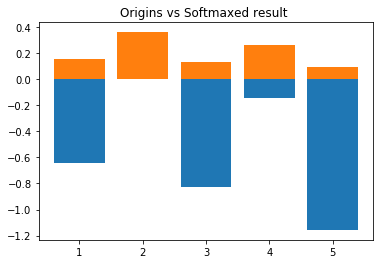

In [4]:
net = core.Net("my_softmax_net")
workspace.ResetWorkspace()
net.GaussianFill([], ["X"], mean=0.0, std=1.0, shape=[1,5], run_once=0)

net.Softmax(["X"], ["Y"])
workspace.RunNetOnce(net)
#for name in ["X","Y"]:
#    print("{}:\n{}".format(name, workspace.FetchBlob(name)))
    
pyplot.bar([1,2,3,4,5],workspace.FetchBlob("X")[0])
pyplot.bar([1,2,3,4,5],workspace.FetchBlob("Y")[0])
pyplot.title("Origins vs Softmaxed result ");

## Fully Connected
[FC](https://en.wikipedia.org/wiki/) is defined as:
$$ f = X\times{W^T} + b $$

In [5]:
net = core.Net("my_FC_net")
workspace.ResetWorkspace()
net.GaussianFill([], ["X"], mean=0.0, std=1.0, shape=[2, 3], run_once=0)
net.GaussianFill([], ["W"], mean=0.0, std=1.0, shape=[5, 3], run_once=0)
net.ConstantFill([], ["b"], shape=[5,], value=0.0, run_once=0)

net.FC(["X", "W", "b"], ["Y"])
workspace.RunNetOnce(net)

for name in ["X","W","Y"]:
    print("{}:\n{}".format(name, workspace.FetchBlob(name)))

X:
[[ 0.66724014 -1.8964349  -0.47131905]
 [-0.16126639 -0.26135415 -2.27391434]]
W:
[[-0.27459237  0.48061958  1.17310417]
 [-0.80509013 -1.68721223 -0.26957217]
 [ 1.21115172 -0.90264088  0.33203143]
 [ 0.45797631 -1.5286119   2.12537003]
 [ 1.76408386  0.96122581  0.60869533]]
Y:
[[-1.64758921  2.78955412  2.36343598  2.2027657  -0.93272436]
 [-2.74886775  1.18377781 -0.71442014 -4.50725651 -1.91982889]]
